<a href="https://colab.research.google.com/github/linhoangce/ml_with_pytorch_and_scikitlearn/blob/main/chapter12_nn_training_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topics covered:

* How PyTorch improves training performance
* Working with PyTorch's `Dataset` and `DataLoader` to build input pipelines and enable efficient model training
* Working with PyTorch to write optimized machine learning code
* Using the `torch.nn` module to implement common deep learning architectures conveniently
* Choosing activation functions for artificial NNs

# First steps with PyTorch

## Creating tensor in PyTorch

In [15]:
import torch
import numpy as np

np.set_printoptions(precision=3)

a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

t_a, t_b

(tensor([1, 2, 3]), tensor([4, 5, 6], dtype=torch.int32))

In [16]:
t_ones = torch.ones(2, 3)
t_ones, t_ones.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 torch.Size([2, 3]))

In [17]:
# creat a tensor of random values
rand_tensor = torch.rand(2, 3)
rand_tensor


tensor([[0.5804, 0.2894, 0.7231],
        [0.8664, 0.6653, 0.9282]])

## Manipulating datatype and shape of a tensor


In [18]:
# change datatype with `to()`
t_a_new = t_a.to(torch.int64)
t_a_new.dtype, t_a.dtype

(torch.int64, torch.int64)

In [19]:
b.dtype

dtype('int32')

In [20]:
b = t_b.to(torch.int64)
b.dtype

torch.int64

In [21]:
# transpose tensors
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
t_tr.shape, t.shape

(torch.Size([5, 3]), torch.Size([3, 5]))

In [22]:
t.T.shape

torch.Size([5, 3])

In [23]:
# reshape tensors, e.g 1d -> 2d
t = torch.zeros(30)
t_re = t.reshape(5, 6)
t_re.shape, t.shape

(torch.Size([5, 6]), torch.Size([30]))

In [24]:
# remove dimension
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
t.shape, t_sqz.shape

(torch.Size([1, 2, 1, 4, 1]), torch.Size([1, 2, 4, 1]))

## Applying mathematical operations to tensors

In [25]:
# initialize two random tensors
# one with uniform distributions range [-1, 1]
# and the other a standard normal distribution
torch.manual_seed(1)

# `torch.rand` returns a tensor filled with rand numbers
# from a uniform distribution in range [0, 1]
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

t1, t2

(tensor([[ 0.5153, -0.4414],
         [-0.1939,  0.4694],
         [-0.9414,  0.5997],
         [-0.2057,  0.5087],
         [ 0.1390, -0.1224]]),
 tensor([[ 0.8590,  0.7056],
         [-0.3406, -1.2720],
         [-1.1948,  0.0250],
         [-0.7627,  1.3969],
         [-0.3245,  0.2879]]))

In [26]:
# compute element-wise product
t3 = torch.multiply(t1, t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [27]:
t4 = torch.mean(t1, axis=0)
t4

tensor([-0.1373,  0.2028])

In [28]:
# matrix multiplication
t5 = torch.matmul(t1, t2.T)
t5

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [29]:
t6 = t1.T.matmul(t2)
t6

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])

In [30]:
# compute L^p norm of a tensor
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
norm_t1

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

## Split, stack, and conatenate tensors

In [31]:
torch.manual_seed(1)

t = torch.rand(6)
t

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])

In [32]:
# split tensors but providing number of splits
t_s = torch.chunk(t, 3)
[item.numpy() for item in t_s]

[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [33]:
t_s

(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))

In [34]:
t = torch.rand(7)
t.split(3)

(tensor([0.3971, 0.7544, 0.5695]),
 tensor([0.4388, 0.6387, 0.5247]),
 tensor([0.6826]))

In [35]:
# split tensors by providing sizes of different splits
torch.manual_seed(1)

t = torch.rand(5)
t

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])

In [36]:
t_s = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_s]

[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

### Concatenate or stack tensors to create a single tensor

In [37]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
C

tensor([1., 1., 1., 0., 0.])

In [38]:
torch.cat((A, B))

tensor([1., 1., 1., 0., 0.])

In [39]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack((A, B))
S

tensor([[1., 1., 1.],
        [0., 0., 0.]])

In [40]:
torch.stack([A, B], axis=1)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

# Building input pipelines in PyTorch

## Creating a PyTorch DataLoader from existing tensors

In [41]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
  print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [42]:
# create batches from a dataset
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader):
  print(f'batch {i}: {batch}')

batch 0: tensor([0., 1., 2.])
batch 1: tensor([3., 4., 5.])


## Combining two tensors into a joint dataset

In [43]:
torch.manual_seed(1)

# create two tensors reprensenting features and labels
x = torch.rand([4, 3], dtype=torch.float32)
y = torch.arange(4)

x, y

(tensor([[0.7576, 0.2793, 0.4031],
         [0.7347, 0.0293, 0.7999],
         [0.3971, 0.7544, 0.5695],
         [0.4388, 0.6387, 0.5247]]),
 tensor([0, 1, 2, 3]))

In [44]:
### Create a joint dataset from two tensors
# first, create a `Dataset` class which inherit `Dataset`
# and must implement __len__ and __getitem__

from torch.utils.data import Dataset

class JointDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]


In [45]:
# create joint dataset
joint_dataset = JointDataset(x, y)

for ex in joint_dataset:
  print(f'x: {ex[0]},   y: {ex[1]}')

x: tensor([0.7576, 0.2793, 0.4031]),   y: 0
x: tensor([0.7347, 0.0293, 0.7999]),   y: 1
x: tensor([0.3971, 0.7544, 0.5695]),   y: 2
x: tensor([0.4388, 0.6387, 0.5247]),   y: 3


In [46]:
# if second dataset is a lbeled dataset in form of tensors
# we can simple utilize `torch.utils.data.TensorDataset` class
j_dataset = torch.utils.data.TensorDataset(x, y)

for ex in j_dataset:
  print(f'x: {ex[0]},   y: {ex[1]}')

x: tensor([0.7576, 0.2793, 0.4031]),   y: 0
x: tensor([0.7347, 0.0293, 0.7999]),   y: 1
x: tensor([0.3971, 0.7544, 0.5695]),   y: 2
x: tensor([0.4388, 0.6387, 0.5247]),   y: 3


## Shuffle, batch, and repeat

In [47]:
# shuffle data
torch.manual_seed(1)

data_loader = DataLoader(dataset=joint_dataset,
                         batch_size=2,
                         shuffle=True)

for i, batch in enumerate(data_loader):
  print(f'batch {i}: \nx: {batch[0]}, y: {batch[1]}')

batch 0: 
x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]), y: tensor([2, 0])
batch 1: 
x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]), y: tensor([1, 3])


In [48]:
# when training a model for multple epochs,
# we need to shuffle and iterate over daatset
# by desired number of epochs
for epoch in range(2):
  print(f'epoch: {epoch}')
  for i, batch in enumerate(data_loader, 1): # start from 1 instead of 0
    print(f'batch: {i}: x: {batch[0]}, y: {batch[1]}')

epoch: 0
batch: 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]), y: tensor([0, 2])
batch: 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]), y: tensor([1, 3])
epoch: 1
batch: 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]), y: tensor([3, 2])
batch: 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]), y: tensor([0, 1])


# Creating a dataset from files on local storage disk

In [49]:
# download the image folder
# https://sebastianwallkoetter.wordpress.com/2022/01/30/copy-github-folders-using-python/
!pip install fsspec

In [50]:
import fsspec
from pathlib import Path

targ_dir = Path('cat_dog_images')
targ_dir.mkdir(exist_ok=True, parents=True)

fs = fsspec.filesystem('github',
                       org='rasbt',
                       repo='machine-learning-book')
fs.get(fs.ls('ch12/cat_dog_images'),
       targ_dir.as_posix(),
       recursive=True)



In [51]:
# check content of these files
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
for f in file_list:
  print(f)

cat_dog_images/cat-01.jpg
cat_dog_images/cat-02.jpg
cat_dog_images/cat-03.jpg
cat_dog_images/dog-01.jpg
cat_dog_images/dog-02.jpg
cat_dog_images/dog-03.jpg


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


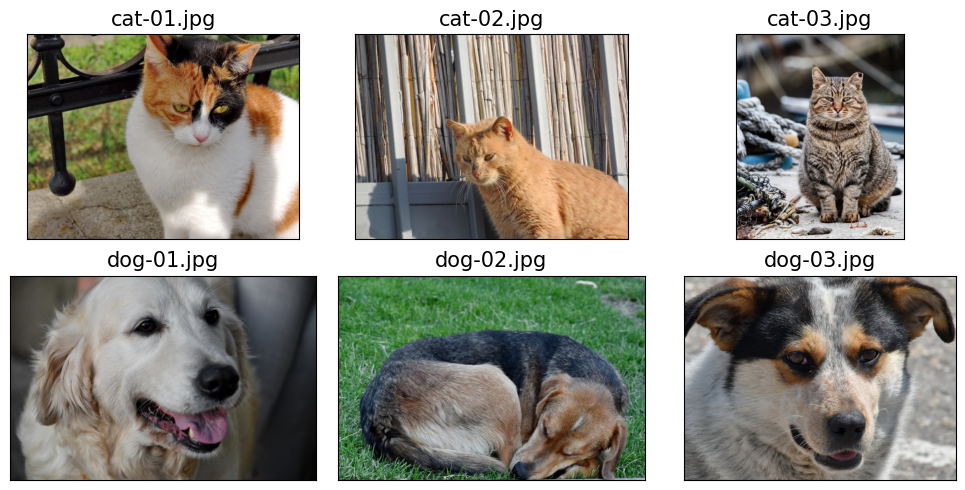

In [52]:
# visualize images
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))

for i, file in enumerate(file_list):
  img = Image.open(file)
  print(f'Image shape: {np.array(img).shape}')
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [53]:
# encode labels from list of filenames,
# label 1 as dogs and 0 cats
labels = [1 if 'dog' in os.path.basename(file)
          else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [54]:
# join two arrays into a dataset
from torch.utils.data import Dataset

class ImageDataset(Dataset):
  def __init__(self, file_list, labels):
    self.file_list = file_list
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    file = self.file_list[idx]
    label = self.labels[idx]
    return file, label


In [55]:
image_dataset = ImageDataset(file_list, labels)

for file, label in image_dataset:
  print(f'file: {file}, label: {label}')

file: cat_dog_images/cat-01.jpg, label: 0
file: cat_dog_images/cat-02.jpg, label: 0
file: cat_dog_images/cat-03.jpg, label: 0
file: cat_dog_images/dog-01.jpg, label: 1
file: cat_dog_images/dog-02.jpg, label: 1
file: cat_dog_images/dog-03.jpg, label: 1


In [56]:
# load image content from its file path,
# decode raw content, and resize it to 80x120
import torchvision.transforms as transforms

img_h, img_w = 80, 120

transform = transforms.Compose([
    transforms.Resize((img_h, img_w)),
    transforms.ToTensor()
])

In [57]:
# update `ImageDataset` class with `transform`
class ImageDataset(Dataset):
  def __init__(self, file_list, labels, transform=None):
    self.file_list = file_list
    self.labels = labels
    self.transform = transform

  def __getitem__(self, idx):
    img = Image.open(self.file_list[idx])

    if self.transform is not None:
      img = self.transform(img)

    label = self.labels[idx]

    return img, label

  def __len__(self):
    return len(self.labels)


In [58]:
image_dataset = ImageDataset(file_list, labels, transform=transform)

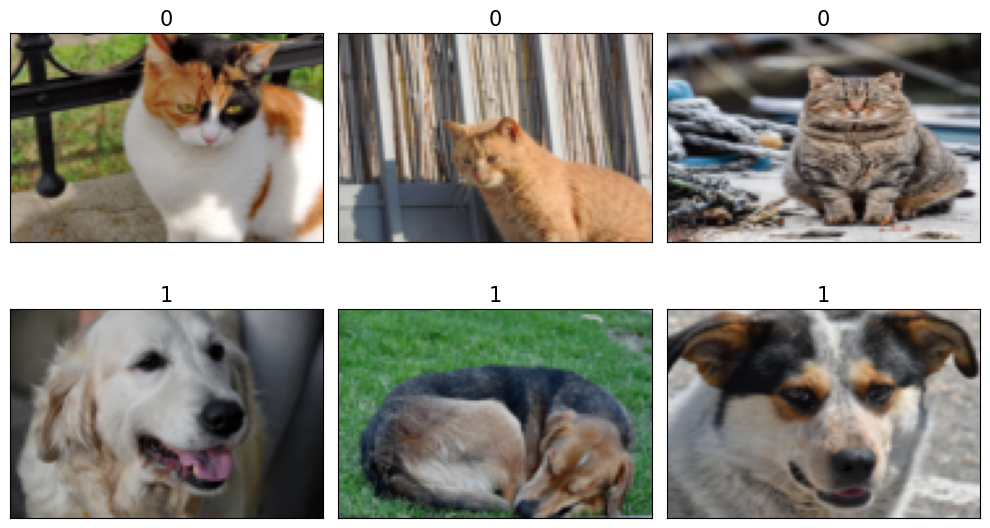

In [59]:
# visualize transformed images
fig = plt.figure(figsize=(10, 6))

for i, ex in enumerate(image_dataset):
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(ex[0].numpy().transpose((1, 2, 0)))
  ax.set_title(f'{ex[1]}', size=15)

plt.tight_layout()
plt.show()

## Fetching available datasets from the `torchvision.datasets` library

In [60]:
# download `CelebA` dataset
import torchvision

image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
    image_path,
    split='train',
    target_type='attr',
    download=True
)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.

In [ ]:
# check if the object is of `torch.utils.data.Dataset`
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [ ]:
# examine data
ex = next(iter(celeba_dataset))
ex

In [ ]:
# visualize first 18 examples with `Smiling` label
from itertools import islice

fig = plt.figure(figsize=(12, 8))

for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
  ax = fig.add_subplot(3, 6, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image)
  ax.set_title(f'{attributes[31]}', size=15)

plt.show()

# Building an NN model in PyTorch

## The Pytorch neural network module (`torch.nn`)

### Building a linear regression model

Text(0, 0.5, 'y')

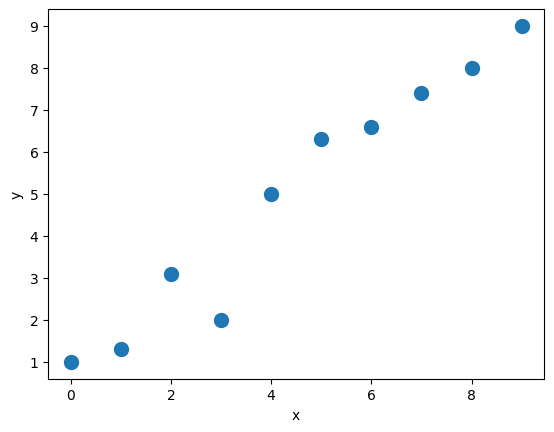

In [61]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0],
                   dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

In [62]:
# standardize features
from torch.utils.data import TensorDataset

X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

train_dataset = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_dataset, batch_size, shuffle=True)

In [63]:
### define a linear regression model from scratch

torch.manual_seed(1)

weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
  return xb @ weight + bias

In [64]:
# define loss function to mininize and find optimal weights
# using Mean Squared Error
def loss_fn(input, target):
  return (input - target).pow(2).mean()

In [65]:
### implement stochastic gradient descent algorithm
# using `torch.autograd.backward()` to compute gradients
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()

  with torch.inference_mode():
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    weight.grad.zero_()
    bias.grad.zero_()

  if epoch % log_epochs == 0:
    print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 46.5720
Epoch 10  Loss 27.1502
Epoch 20  Loss 1.6446
Epoch 30  Loss 14.4571
Epoch 40  Loss 11.7827
Epoch 50  Loss 6.4122
Epoch 60  Loss 0.6339
Epoch 70  Loss 3.1562
Epoch 80  Loss 2.0100
Epoch 90  Loss 0.3107
Epoch 100  Loss 0.7625
Epoch 110  Loss 1.0024
Epoch 120  Loss 0.0232
Epoch 130  Loss 0.5138
Epoch 140  Loss 0.0741
Epoch 150  Loss 1.8712
Epoch 160  Loss 0.0007
Epoch 170  Loss 0.0850
Epoch 180  Loss 0.0634
Epoch 190  Loss 0.0012


Final Parameters: (2.670930862426758, 4.88258695602417)


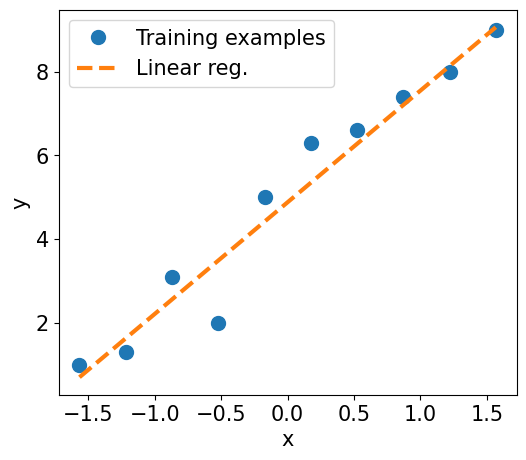

In [66]:
# look at trained model and plot its result
# create a np array of values evenly spaced between 0 and 9
# then standardize features
print(f'Final Parameters: {weight.item(), bias.item()}')

X_test = np.linspace(0, 9,
                     num=100,
                     dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)

plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


## Model training via the `torch.nn` and `torch.optim` modules

In [67]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction='mean')

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)


In [68]:
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    # 1. Generate predictions
    pred = model(x_batch)[:, 0]
    # 2. Calculate loss
    loss = loss_fn(pred, y_batch)
    # 3. Reset gradients to zero
    optimizer.zero_grad()
    # 4. Compute gradients
    loss.backward()
    # 5. Update parameters using gradients
    optimizer.step()

  if epoch % log_epochs == 0:
    print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6684
Epoch 10 Loss 29.1377
Epoch 20 Loss 20.9207
Epoch 30 Loss 0.1257
Epoch 40 Loss 12.4922
Epoch 50 Loss 1.7845
Epoch 60 Loss 7.6425
Epoch 70 Loss 2.5606
Epoch 80 Loss 0.0157
Epoch 90 Loss 0.7548
Epoch 100 Loss 0.8412
Epoch 110 Loss 0.4923
Epoch 120 Loss 0.0823
Epoch 130 Loss 0.0794
Epoch 140 Loss 0.0891
Epoch 150 Loss 0.0973
Epoch 160 Loss 0.1043
Epoch 170 Loss 0.1103
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0764


In [69]:
print(f'Final Parameters: {model.weight.item()}, {model.bias.item()}')

Final Parameters: 2.6496422290802, 4.87706995010376


## Building a multilayer preceptron for classifying flowers in the Iris dataset

In [70]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1
)

In [71]:
# standardize features
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_dataset = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)

batch_size = 2
train_dataloader = DataLoader(train_dataset,
                              batch_size,
                              shuffle=True)


In [72]:
# define multilayer NN model
class Model(nn.Module):
  def __init__(self,
               input_size,
               hidden_size,
               output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x


In [73]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)
model

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [74]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate)


In [75]:
num_epochs = 100
loss_hist = [0] * num_epochs
acc_hist = [0] * num_epochs

for epoch in range(num_epochs):
  for x_batch, y_batch in train_dataloader:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_hist[epoch] += loss.item() * y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    acc_hist[epoch] += is_correct.mean()

  loss_hist[epoch] /= len(train_dataloader.dataset)
  acc_hist[epoch] /= len(train_dataloader.dataset)

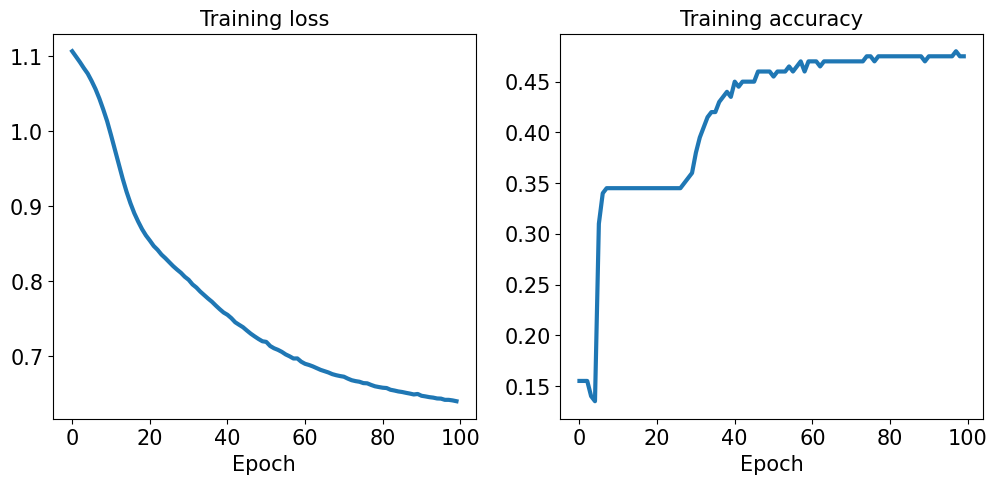

In [76]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)

ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)

ax.plot(acc_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

## Evaluating the trained model on the test dataset

In [77]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, axis=1) == y_test).float()
acc = correct.mean()

print(f'Test Acc: {acc:.4f}')

Test Acc: 0.9800


## Saving and reloading the trained model

In [78]:
path = 'iris_classifier.pt'
torch.save(model.state_dict(), path)

In [79]:
# reload saved model
model_reload = Model(input_size, hidden_size, output_size)

model_reload.load_state_dict(torch.load(path))

# verify model architecture
model_reload.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [80]:
# evaluate this reloaded model to verify results are same
test_pred = model_reload(X_test_norm)
correct = (torch.argmax(test_pred, axis=1) == y_test).float()
acc = correct.mean()
acc

tensor(0.9800)

In [81]:
# save the entire model architecture
path = 'iris_classifier_full.pt'
torch.save(model, path)


In [82]:
# reload model
torch.load(path, weights_only=False)

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

# Choosing activation functions for multilayer neural networks

## Logistic function recap

Net input, z:

$$ z = w_0x_0 + w_1x_1 + \dots + w_mx_m = \sum_{i=0}^mw_iX_i = w^Tx $$

Logistic (sigmoid) function:

$$ \sigma_\text{logistic}(z) = \frac{1}{1 + e^{-z}} $$

In [83]:
# let's take a look at a two-dimensional data point, x,
# and a model with following weight coefficients assigned
# to w vector
import numpy as np

X = np.array([1, 1.4, 2.5]) # first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
  return np.dot(X, w)

def logistic(z):
  return 1. / (1 + np.exp(-z))

def logistic_activation(X, w):
  z = net_input(X, w)
  return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [84]:
# demonstrate an output layer consisting of multiple
# logistic activation units does not produce meaning,
# interpretable probability values

# W: array with shape = (n_output_units, n_hidden_units+1)
#    note that the first column are the bias units
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A: data array with shape = (n_hidden_units + 1, n_samples)
#    note that the first column of this array must be 1
A = np.array([[1, 0.1, 0.3, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print(f'Net Input: {Z}')
print(f'Output Units: {y_probas}')

Net Input: [1.7  0.66 1.53]
Output Units: [0.846 0.659 0.822]


In [85]:
y_class = np.argmax(y_probas)
y_class

np.int64(0)

## Estimating class probabilities in multiclass classification via the softmax function

$$ p(z) = \sigma(z) = \frac{e^{z_i}}{\sum_{j=1}^Me^{z_j}} $$

In [86]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)

print(f'Probabilities: {y_probas}')
np.sum(y_probas)

Probabilities: [0.455 0.161 0.384]


np.float64(1.0)

In [87]:
torch.softmax(torch.from_numpy(Z),
              dim=0)

tensor([0.4551, 0.1609, 0.3840], dtype=torch.float64)

## Broadening the output spectrum using a hyperbolic tangent

Another sigmoidal function that is often used in the hidden layer of artificial NNs is the **hyperbolic tangent** (commonly known as **tanh**), which can be interpreted as rescaled version of the logistic function:

$$ \sigma_\text{logistic}(z) = \frac{1}{1 + e^{-z}} $$
$$ \sigma_\text{tanh}(z) = 2 \times \sigma_\text{logistic}(2z) - 1 = \frac{e_z - e^{-z}}{e^z + e^{-z}} $$

The advantage of the hyperbolic tangent over the logistic function is that it has a broader output spectrum ranging in the open interval (-1, 1), which can improve the convergence of the backpropagation algorithm.

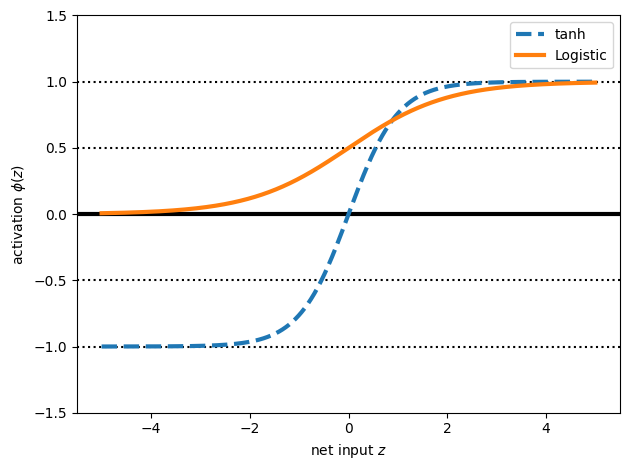

In [88]:
# plot the two sigmoidal functions for comparison
import matplotlib.pyplot as plt

def tanh(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

z = np.arange(-5, 5, 0.005)

log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim(-1.5, 1.5)
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linewidth=3)
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act,
         linewidth=3,
         linestyle='--',
         label='tanh')
plt.plot(z, log_act,
         linewidth=3,
         label='Logistic')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [89]:
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [90]:
torch.tanh(torch.from_numpy(z))

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

## Rectified linear unit activation

In [91]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)